In [27]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [28]:
# Load the data
data = pd.read_csv('c://Users//prana//Downloads//car data.csv')
print(car_data)


    Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Selling_type Transmission  Owner  
0         Dealer       Manual      0  
1         Dealer       Manual    

In [29]:
# Display first few rows
print("🔹 First 5 rows of the dataset:")
print(data.head())

🔹 First 5 rows of the dataset:
  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  


In [30]:
# Basic info
print("\n🔹 Dataset Information:")
print(data.info())



🔹 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None


In [31]:

# Check for missing values
print("\n🔹 Missing Values:")
print(data.isnull().sum())




🔹 Missing Values:
Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64


In [32]:

# Encode categorical columns
label_enc = LabelEncoder()
for col in data.select_dtypes(include=['object']).columns:
    data[col] = label_enc.fit_transform(data[col])


In [33]:
# Display dataset after encoding
print("\n🔹 Dataset after encoding categorical features:")
print(data.head())


🔹 Dataset after encoding categorical features:
   Car_Name  Year  Selling_Price  Present_Price  Driven_kms  Fuel_Type  \
0        90  2014           3.35           5.59       27000          2   
1        93  2013           4.75           9.54       43000          1   
2        68  2017           7.25           9.85        6900          2   
3        96  2011           2.85           4.15        5200          2   
4        92  2014           4.60           6.87       42450          1   

   Selling_type  Transmission  Owner  
0             0             1      0  
1             0             1      0  
2             0             1      0  
3             0             1      0  
4             0             1      0  


In [42]:

# Define features (X) and target (y)
X = data.drop(['Selling_Price'], axis=1)  # adjust column name if needed
y = data['Selling_Price']
print()

In [44]:
# Split dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [45]:

# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [46]:

# Predict on test data
y_pred = model.predict(X_test)

In [47]:
# Evaluate model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [48]:
print("\n🔹 Model Evaluation:")
print(f"R² Score: {r2:.3f}")
print(f"MAE: {mae:.3f}")
print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")


🔹 Model Evaluation:
R² Score: 0.846
MAE: 1.215
MSE: 3.537
RMSE: 1.881


In [49]:
# Compare Actual vs Predicted
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\n🔹 Actual vs Predicted Prices:")
print(comparison.head(10))


🔹 Actual vs Predicted Prices:
     Actual  Predicted
177    0.35   2.974919
289   10.11   8.326128
228    4.95   6.016123
198    0.15  -1.381724
60     6.95   9.279406
9      7.45   7.069290
118    1.10   1.308246
154    0.50   0.741541
164    0.45   1.384000
33     6.00   7.121803


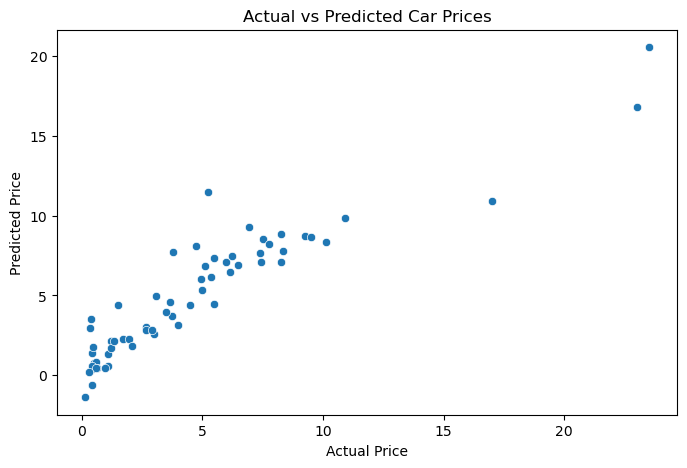

In [52]:
# Plot Actual vs Predicted
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices")
plt.show()

In [53]:
# Save trained model (optional)
import joblib
joblib.dump(model, "car_price_model.pkl")
print("\n✅ Model saved as 'car_price_model.pkl'")


✅ Model saved as 'car_price_model.pkl'
